# <font color='red'>Assignment 10.4</font> : 8D LR SVM

## <font color='red'>Task-D</font> : Collinear features and their effect on linear models

In [1]:
import warnings
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

## Doing perturbation test to check the presence of collinearity
## <font color='red'>Task 1.</font> :  Logistic Regression

### <font color='blue'>1. Finding the Correlation between the features : </font>

a. check the correlation between the features.

b. plot heat map of correlation matrix using seaborn heatmap

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


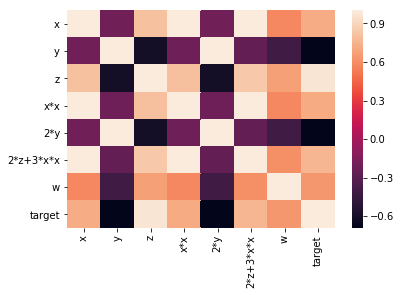

In [5]:
data_corr = data.corr()
data_htmp = sns.heatmap(data_corr)
data_corr

### <font color='blue'> Observation : </font>
From Above heatmap we can say that after slightly change in original features are not most affected in correations because in above heatmap show digonal element are correlated as we expect.

### <font color='blue'>2. Finding the best model for the given data</font>
a. Train Logistic regression on data(X,Y) that we have created in the above cell

b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or random search CV make sure you choose the alpha in log space)

c. Creat a new Logistic regression with the best alpha (search for how to get the best hyper parameter value), name the best model as 'best_model'

In [6]:
SGD_LR = SGDClassifier(loss = 'log', random_state = 10)
alphas = {"alpha" : [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000, 10000]}
G_S_CV = GridSearchCV(SGD_LR, alphas, cv = 5)
G_S_CV.fit(X, Y)
G_S_CV.best_params_

{'alpha': 0.0001}

### <font color='blue'>3. Getting the weights with the original data</font>
a. train the 'best_model' with X, Y

b. Check the accuracy of the model 'best_model_accuracy'

c. Get the weights W using best_model.coef_

In [7]:
best_model = SGDClassifier(loss = 'log', alpha = 0.0001)
best_model.fit(X, Y)
y_predict = best_model.predict(X)
best_model_accuracy = accuracy_score(Y, y_predict)
best_model_coef = best_model.coef_

### <font color='blue'>4. Modifying original data</font>
a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)

b. Train the same 'best_model' with data (X', Y)

c. Check the accuracy of the model 'best_model_accuracy_edited'

d. Get the weights W' using best_model.coef_

In [8]:
X_dash = X + 0.01
best_model.fit(X_dash, Y)
y_predict = best_model.predict(X_dash)
best_model_accuracy_edited = accuracy_score(Y, y_predict)
best_model_coef_edited = best_model.coef_

### <font color='blue'>5.  Checking deviations in metric and weights</font> 
a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'

b. find the absolute change between each value of W and W' ==> |(W-W')|

c. print the top 4 features which have higher % change in weights compare to the other feature

In [9]:
print('*'*25, 'Difference Between "best_model_accuracy_edited" and "best_model_accuracy"', '*'*26)
print("Original Accuracy : ", best_model_accuracy)
print("Edited Accuracy : ", best_model_accuracy_edited)
print("Difference Between Accuracy : ", best_model_accuracy-best_model_accuracy_edited)
print('\n')
print('*'*35, "Difference Between each value of W and W' ==> |(W-W')|", '*'*35)
print("Original Weight W : ", '\n')
print(best_model_coef, '\n')
print("Edited Weight W' : ", '\n')
print(best_model_coef_edited, '\n')
print("Difference Between Weights |(W-W')| : ", '\n' )
change_in_weight = np.abs(best_model_coef-best_model_coef_edited)
print(change_in_weight)
print('\n')
print('*'*22, "Top 4 features which have higher % change in weights compare to the other feature", '*'*22)
data_columns = list(data.columns)
for indx in np.argsort(-change_in_weight).reshape(-1)[:4]:
    print(data_columns[indx])

************************* Difference Between "best_model_accuracy_edited" and "best_model_accuracy" **************************
Original Accuracy :  1.0
Edited Accuracy :  1.0
Difference Between Accuracy :  0.0


*********************************** Difference Between each value of W and W' ==> |(W-W')| ***********************************
Original Weight W :  

[[ 2.65319829 -2.22040923  4.82933037  2.56549431 -2.22040923  2.89202416
   2.17624176]] 

Edited Weight W' :  

[[  7.94210023 -13.35595253  18.78575286   7.43415836 -13.35595253
    8.9605492    1.37051688]] 

Difference Between Weights |(W-W')| :  

[[ 5.28890194 11.13554329 13.95642248  4.86866405 11.13554329  6.06852504
   0.80572488]]


********************** Top 4 features which have higher % change in weights compare to the other feature **********************
z
y
2*y
2*z+3*x*x


### <font color='blue'> Observation : </font>
From our observation about the above code output we can say weight affected when we add noise to our dataset and weight changes drastically, and it indicate multicolinearity. But most important thing is our model does not affected due to multicolinearity.

## <font color='red'>Task 2.</font> :  Linear SVM

### <font color='blue'>2. Finding the best model for the given data</font>
a. Train Logistic regression on data(X,Y) that we have created in the above cell

b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or random search CV make sure you choose the alpha in log space)

c. Creat a new Logistic regression with the best alpha (search for how to get the best hyper parameter value), name the best model as 'best_model'

In [10]:
Linear_SVM = SGDClassifier(loss = 'hinge', random_state = 10)
alphas = {"alpha" : [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000, 10000]}
G_S_CV = GridSearchCV(Linear_SVM, alphas, cv = 5)
G_S_CV.fit(X, Y)
G_S_CV.best_params_

{'alpha': 1e-05}

### <font color='blue'>3. Getting the weights with the original data</font>
a. train the 'best_model' with X, Y

b. Check the accuracy of the model 'best_model_accuracy'

c. Get the weights W using best_model.coef_

In [11]:
best_model = SGDClassifier(loss = 'log', alpha = 0.0001)
best_model.fit(X, Y)
y_predict = best_model.predict(X)
best_model_accuracy = accuracy_score(Y, y_predict)
best_model_coef = best_model.coef_

### <font color='blue'>4. Modifying original data</font>
a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)

b. Train the same 'best_model' with data (X', Y)

c. Check the accuracy of the model 'best_model_accuracy_edited'

d. Get the weights W' using best_model.coef_

In [12]:
X_dash = X + 0.01
best_model.fit(X_dash, Y)
y_predict = best_model.predict(X_dash)
best_model_accuracy_edited = accuracy_score(Y, y_predict)
best_model_coef_edited = best_model.coef_

### <font color='blue'>5.  Checking deviations in metric and weights</font> 
a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'

b. find the absolute change between each value of W and W' ==> |(W-W')|

c. print the top 4 features which have higher % change in weights compare to the other feature

In [13]:
print('*'*25, 'Difference Between "best_model_accuracy_edited" and "best_model_accuracy"', '*'*26)
print("Original Accuracy : ", best_model_accuracy)
print("Edited Accuracy : ", best_model_accuracy_edited)
print("Difference Between Accuracy : ", best_model_accuracy-best_model_accuracy_edited)
print('\n')
print('*'*35, "Difference Between each value of W and W' ==> |(W-W')|", '*'*35)
print("Original Weight W : ", '\n')
print(best_model_coef, '\n')
print("Edited Weight W' : ", '\n')
print(best_model_coef_edited, '\n')
print("Difference Between Weights |(W-W')| : ", '\n' )
change_in_weight = (np.abs(best_model_coef-best_model_coef_edited))
print(change_in_weight)
print('\n')
print('*'*22, "Top 4 features which have higher % change in weights compare to the other feature", '*'*22)
data_columns = list(data.columns)
for indx in np.argsort(-change_in_weight).reshape(-1)[:4]:
    print(data_columns[indx])

************************* Difference Between "best_model_accuracy_edited" and "best_model_accuracy" **************************
Original Accuracy :  1.0
Edited Accuracy :  1.0
Difference Between Accuracy :  0.0


*********************************** Difference Between each value of W and W' ==> |(W-W')| ***********************************
Original Weight W :  

[[ 9.64292925 -8.82881754 23.46015273  7.66011038 -8.82881754  9.72656539
   0.13075164]] 

Edited Weight W' :  

[[ 1.62947151 -1.56986035  5.63660332  1.46021686 -1.56986035  1.99449499
   2.32487842]] 

Difference Between Weights |(W-W')| :  

[[ 8.01345774  7.25895719 17.82354942  6.19989352  7.25895719  7.73207039
   2.19412678]]


********************** Top 4 features which have higher % change in weights compare to the other feature **********************
z
x
2*z+3*x*x
y


### <font color='blue'> Observation : </font>
We conclude same for Linear SVM as above.